# Recognizing Handwritten Digits using scikit-learn 

## Problem Statement:

### The Digitsdata set of scikit-learn library provides numerous data-sets that are useful for testing many problems of data analysis and prediction of the results. Some Scientist claims that it predicts the digit accurately 95% of the times. Perform data Analysis to acceptor reject this Hypothesis. 

In [1]:
# Import Libraries 
import numpy as np 
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset from sk-learn library
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
# Description of dataset
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
# shape of dataset
print (digits.data.shape)

(1797, 64)


In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<function matplotlib.pyplot.show(close=None, block=None)>

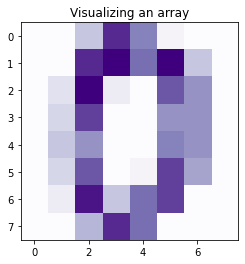

In [7]:
# Ploting Single Digit 
plt.imshow(digits.images[0],cmap=plt.cm.Purples, interpolation='nearest')
plt.title('Visualizing an array')
plt.show

### To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

In [8]:
# Flatten the Data
samples = len(digits.images)
data = digits.images.reshape((samples,-1))

In [9]:
print(data.view())

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [10]:
sample = len(digits.images)
print(sample)

1797


In [11]:
digits.target.size

1797

In [12]:
len(data)

1797


# Training and Testing split 

In [13]:
# spliting data in training and testing split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target,test_size=0.3,random_state=0)

In [14]:
print(f'lenth of x_train is',len(x_train))
print(f'length of x_test is',len(x_test))

lenth of x_train is 1257
length of x_test is 540


In [15]:
print(digits.data[0])
print(digits.target[0:10])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 3 4 5 6 7 8 9]


## The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image.

## Visualization for Digits From 0 to 9

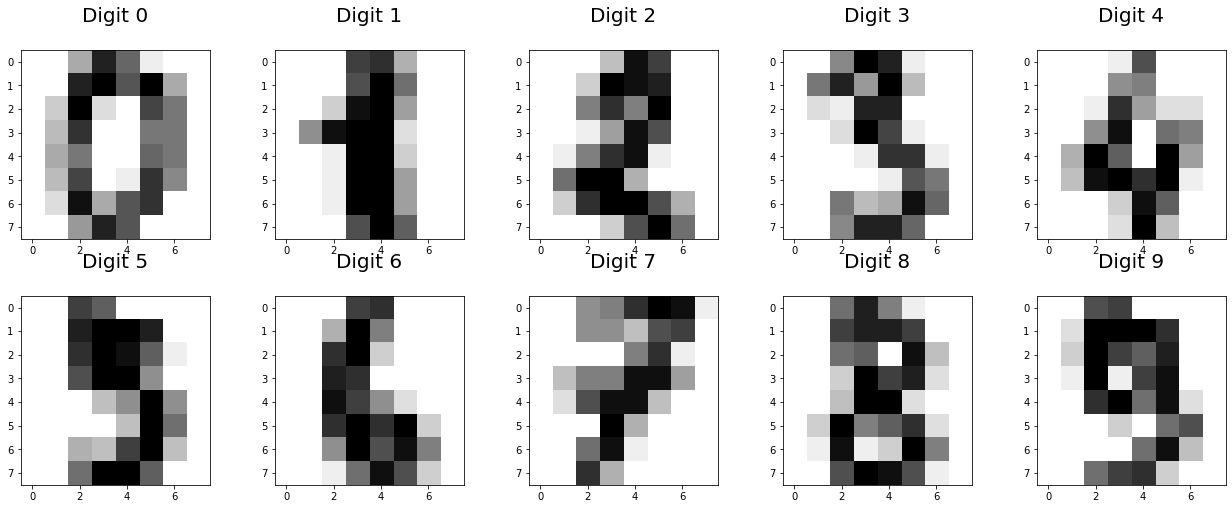

In [16]:
# Visualization of digits
plt.figure(figsize=(22,8))
plt.subplots_adjust(hspace=0.3)
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(2, 5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.binary)
    plt.title("Digit %d\n" %label, fontsize =20)

## Prediction using:

## 1.SVC(Support Vector Classifier)

In [17]:
# creating the model
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100)

In [18]:
# fitting the svc model
svc.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

In [19]:
y_pred = svc.predict(x_test)

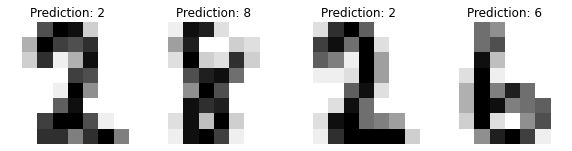

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, predict in zip(axes, x_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {predict}")

In [21]:
# Classification report and confusion matrix for SVC
svc_confusion = confusion_matrix(y_test,y_pred)
print(f'Confusion matrix:\n{svc_confusion}\n\n')
print(f'Classification report:\n{classification_report(y_test, y_pred)}')

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       1.00      0.98      0.99        61
           9       0.98      0.98      0.98        57

    accuracy                  

Text(189.2400000000001, 0.5, 'True Label')

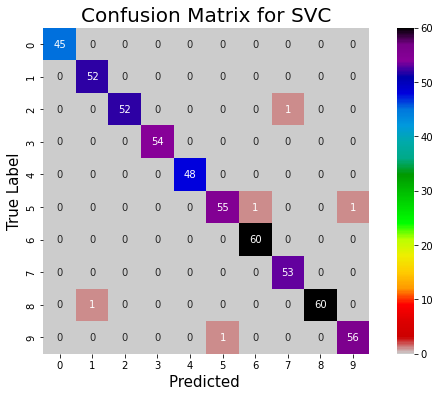

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(svc_confusion,square=True, annot= True, fmt ="d", cmap='nipy_spectral_r')
plt.title('Confusion Matrix for SVC', fontsize = 20)
plt.xlabel('Predicted ', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)

In [23]:
# SVC accuracy score
svc_score = svc.score(x_test, y_test)
print(f'Accuracy score is : {(svc_score*100)}')

Accuracy score is : 99.07407407407408


###   Support Vector Classifier gives 99.07% accuracy

## 2. KNN(K-Nearest Neighbors) Classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [25]:
# training the model
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [26]:
knn_y_pred = knn.predict(x_test)

In [27]:
print(f'The predicted digits for the first 15 samples: {knn_y_pred[:15]}\n')
print(f'The expected digits for the first 15 samples: {y_test[:15]}\n')

The predicted digits for the first 15 samples: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6]

The expected digits for the first 15 samples: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6]



In [28]:
# Classification report and confusion matrix for KNN 
knn_confusion = confusion_matrix(y_test,knn_y_pred)
print(f'Confusion matrix:\n{knn_confusion}\n\n')
print(f'Classification report:\n{classification_report(y_test,knn_y_pred)}')

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  0  1  0  0  0  0]
 [ 0  0 52  0  0  0  0  1  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  1  0  0  1  0 58  0]
 [ 0  0  0  0  0  1  0  0  0 56]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      0.98      0.98        52
           2       0.98      0.98      0.98        53
           3       0.98      0.98      0.98        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.97      1.00      0.98        60
           7       0.96      1.00      0.98        53
           8       1.00      0.95      0.97        61
           9       0.98      0.98      0.98        57

    accuracy                  

Text(189.2400000000001, 0.5, 'True Label')

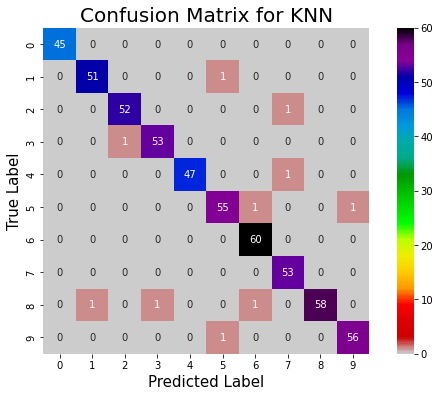

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(knn_confusion,square=True, annot= True, fmt ="d", cmap='nipy_spectral_r')
plt.title('Confusion Matrix for KNN', fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)

In [30]:
knn_score = knn.score(x_test,y_test)
print(f'Accuracy score is : {(knn_score*100)}')

Accuracy score is : 98.14814814814815


###   KNN Classifier gives 98.15% accuracy

## 3. Logistic Regression Classifier

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression()

In [33]:
lr.fit(x_train,y_train)

LogisticRegression()

In [34]:
lr_y_pred = lr.predict(x_test)

In [35]:
# Classification report and confusion matrix for Logistic Regression
lr_confusion = confusion_matrix(y_test,lr_y_pred)
print(f'Confusion matrix:\n{lr_confusion}\n\n')
print(f'Classification report:\n{classification_report(y_test,lr_y_pred)}')

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  2  1]
 [ 0  2 49  2  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  1  1]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  0  0  0  2]
 [ 0  1  0  0  0  0 59  0  0  0]
 [ 0  0  0  1  1  0  0 51  0  0]
 [ 0  3  1  0  0  0  0  0 53  4]
 [ 0  0  0  0  0  1  0  0  1 55]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.94      0.92        52
           2       0.98      0.92      0.95        53
           3       0.95      0.96      0.95        54
           4       0.98      0.98      0.98        48
           5       0.98      0.96      0.97        57
           6       1.00      0.98      0.99        60
           7       0.98      0.96      0.97        53
           8       0.93      0.87      0.90        61
           9       0.87      0.96      0.92        57

    accuracy                  

Text(189.2400000000001, 0.5, 'True Label')

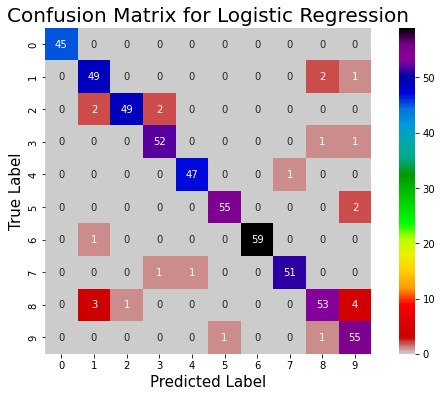

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(lr_confusion,square=True, annot= True, cmap='nipy_spectral_r')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)

In [37]:
lr_score = lr.score(x_test,y_test)
print(f'Accuracy score is : {(lr_score*100)}')

Accuracy score is : 95.37037037037037


### Logistic Regression Classifier gives 95.37% accuracy

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [39]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [40]:
rf_y_pred = rf.predict(x_test)

In [41]:
# Classification report and confusion matrix for Random Forest 
rf_confusion = confusion_matrix(y_test,rf_y_pred)
print(f'Confusion matrix:\n{rf_confusion}\n\n')
print(f'Classification report:\n{classification_report(y_test,rf_y_pred)}')

Confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]
 [ 1  1 50  1  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  0  0  0 47  0  0  1  0  0]
 [ 0  0  0  0  0 55  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  2  0  1  0  0  0  0 58  0]
 [ 0  0  0  0  0  2  0  0  0 55]]


Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.95      1.00      0.97        52
           2       1.00      0.94      0.97        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       0.98      0.95      0.97        61
           9       0.98      0.96      0.97        57

    accuracy                  

Text(189.2400000000001, 0.5, 'True Label')

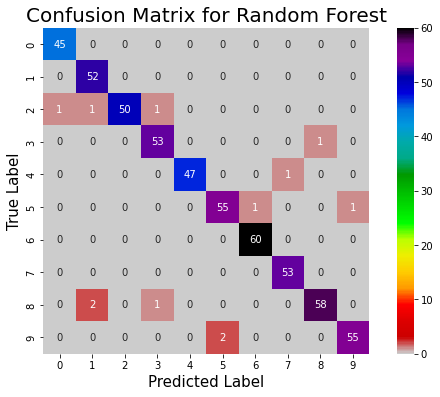

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(rf_confusion,square=True, annot= True, fmt ="d", cmap='nipy_spectral_r')
plt.title('Confusion Matrix for Random Forest', fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 15)
plt.ylabel('True Label', fontsize = 15)

In [43]:
rf_score = rf.score(x_test,y_test)
print(f'Accuracy score is : {(rf_score*100)}')

Accuracy score is : 97.77777777777777


### Random Forest Classifier gives 97.77% accuracy

### Some Scientist claims that it predicts the digit accurately 95% of the times. So we need to find mean of all 4 classifier to justify this hypothesis

In [44]:
# calculating Average for all 4 classifier
Accuracy_avg = (svc_score+knn_score+lr_score+rf_score)/4
print(f'Mean accuracy of all the classifier is:',round(Accuracy_avg,4)*100)

Mean accuracy of all the classifier is: 97.59


### Our classifiers gives mean accuracy of 97.5%

# Conclusion:

## This dataset predicts the digits 97.5% of the time, So we can conclude that the results are consistent with the null Hypothesis.